Computational Social Science Project #2
Enter your Name:"Nalina Sofia Theagarajan"

Semester: Fall 202423

1. Introduction/Setup

a) Import relevant libraries

In [1]:
# import libraries you might need here 
#-----------

import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# use magic function
%matplotlib inline

# set style
sns.set_style("darkgrid")

# use random seed for consistent results 
np.random.seed(273)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

b) Read in and inspect dataframe
Read in the dataframe and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [2]:
# read in and inspect dataframe
# "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv("C:/Users/Nalina Sofia/project-2css-new/Diabetes with Population Info by County 2017.csv", 
                       dtype={"CountyFIPS": str}) 
diabetes.head()
diabetes.info()
diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3220 non-null   object 
 1   State                                                                                                                                                 3220 non-null   object 
 2   CountyFIPS                                                                                                                                            3220 non-null   object

,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
count,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,...,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,1.013323e+05,9.803687e+04,3295.423292,9.803687e+04,7.366104e+04,1.282022e+04,840.862422,90.346894,36.718634,102.258075,...,7.412272e+04,1.906676e+04,1.549044e+04,7.827602e+04,3.809320e+04,4.018282e+04,99.439317,1.549044e+04,6850.940683,8639.495342
std,3.260964e+05,3.142309e+05,13032.711931,3.142309e+05,2.012548e+05,5.514027e+04,3534.196512,534.021931,300.672832,1748.379070,...,2.384994e+05,5.470009e+04,4.432602e+04,2.513513e+05,1.220023e+05,1.293948e+05,14.740158,4.432602e+04,19234.567636,25111.933583
min,7.500000e+01,6.000000e+01,0.000000,6.000000e+01,1.600000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,6.900000e+01,1.900000e+01,1.200000e+01,7.100000e+01,3.600000e+01,3.100000e+01,70.800000,1.200000e+01,0.000000,10.000000
25%,1.121425e+04,1.090100e+04,169.750000,1.090100e+04,9.050250e+03,1.167500e+02,30.000000,0.000000,0.000000,0.000000,...,8.314250e+03,2.583750e+03,2.111500e+03,8.691500e+03,4.355250e+03,4.285250e+03,93.000000,2.111500e+03,984.750000,1126.000000
50%,2.595050e+04,2.537900e+04,492.000000,2.537900e+04,2.161750e+04,8.380000e+02,114.000000,9.000000,0.000000,0.000000,...,1.936550e+04,5.704500e+03,4.698500e+03,2.026050e+04,9.997500e+03,1.019050e+04,96.500000,4.698500e+03,2129.500000,2548.000000
75%,6.655225e+04,6.497525e+04,1742.500000,6.497525e+04,5.711775e+04,5.591000e+03,425.250000,48.000000,6.000000,0.000000,...,4.906400e+04,1.435650e+04,1.171375e+04,5.200525e+04,2.557400e+04,2.664950e+04,100.800000,1.171375e+04,5234.000000,6314.500000
max,1.009805e+07,9.700372e+06,397680.000000,9.700372e+06,5.186859e+06,1.230494e+06,82699.000000,14104.000000,10609.000000,50457.000000,...,7.433332e+06,1.610630e+06,1.299277e+06,7.851531e+06,3.827779e+06,4.023752e+06,414.700000,1.299277e+06,561006.000000,738271.000000


In [3]:
# view data types
diabetes.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                           object
Diabetes_Number                                                                      object
Obesity_Number                                                                       object
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

In [4]:
# look at shape
# look at the dimensions of the diabetes dataframe
print('dimensions of the diabetes dataframe are', diabetes.shape) 

dimensions of the diabetes dataframe are (3220, 95)


In [5]:
# set pandas parameters
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [6]:
# identify non-numeric features
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique())

['Suppressed']


In [7]:
# identify non-numeric features
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique())

['No Data']


In [8]:
# identify non-numeric features
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique())

['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [9]:
# Recode variables

# Diabetes

# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype(int) 

# Obesity
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"]
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype(int)

# Physical Inactivity
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"]
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype(int)

# Some final changes 
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(float)



We should probably scale our county variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [10]:
# Scale to county populations

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [11]:
# check
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [12]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['sex and age_total population_65 years and over_1',
 'race_total population_one race_1',
 'race_total population_two or more races_1',
 'hispanic or latino and race_total population',
 'sex and age_total population',
 'sex and age_total population_18 years and over_1']

In [13]:
# drop columns from duplicates list
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=duplicateColumnNames) 

In [14]:
# Look at the first 5 rows#
#-----------
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = pd.read_csv("C:/Users/NalinaSofia/GIT/Project-2/Diabetes with Population Info by County 2017.csv", 
                       dtype={"CountyFIPS": str}) 
diabetes = diabetes.drop(columns=duplicateColumnNames) 
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [15]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

## 2. Exploratory Data Analysis

Make at least two figures and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to the audience in clear ways.

# EDA #1 and interpretations in this section

In [16]:
# Convert relevant columns to numeric, as some may be read as strings due to formatting issues
diabetes[['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']] = diabetes[
    ['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']
].apply(pd.to_numeric, errors='coerce')

# Group by 'Region' and calculate the mean for health indicators
health_status_by_region = diabetes.groupby('Region')[['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']].sum()

# Display the result
health_status_by_region.reset_index().head(10)


,Region,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number
0,Midwest,5431254.0,16291600.0,11860965.0
1,Northeast,4880588.0,13454983.0,10949335.0
2,South,4747152.0,13567947.0,10507308.0
3,Southeast,5317005.0,14067962.0,11577949.0
4,West,5126980.0,14776873.0,10365850.0


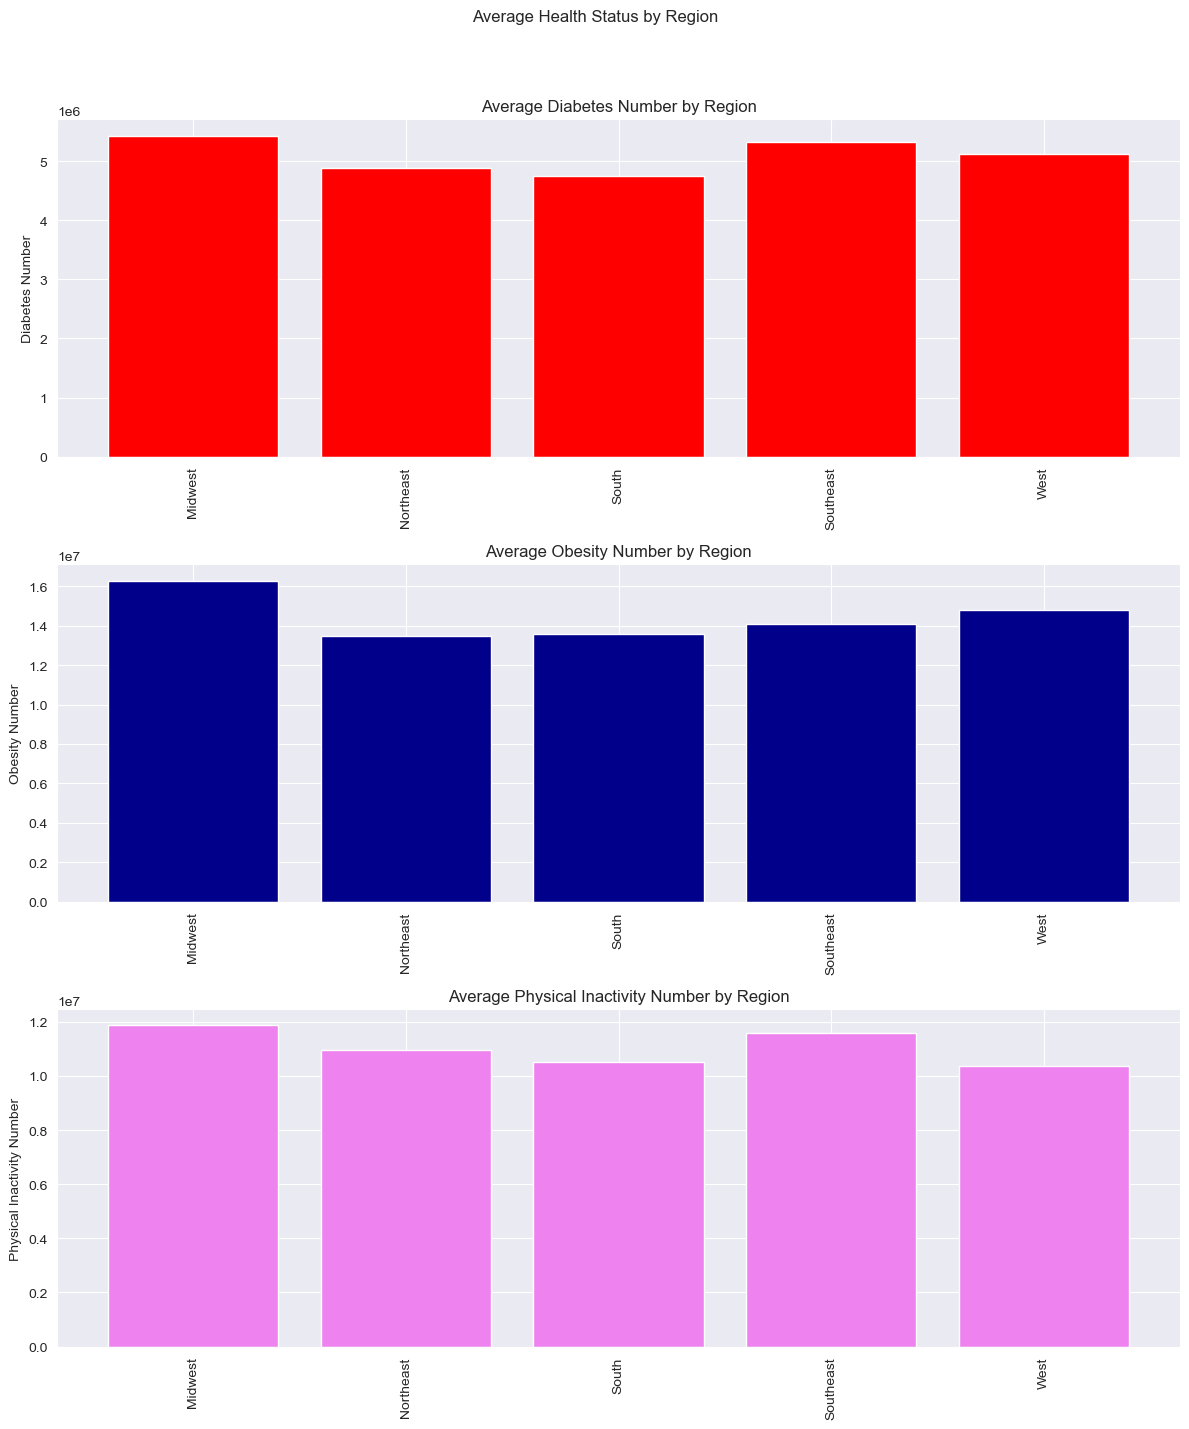

In [17]:
import matplotlib.pyplot as plt

# Set up the figure for subplots
fig, axis = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Average Health Status by Region')

# Plot for Diabetes Number
axis[0].bar(health_status_by_region.index, health_status_by_region['Diabetes_Number'], color='red')
axis[0].set_title('Average Diabetes Number by Region')
axis[0].set_ylabel('Diabetes Number')
axis[0].tick_params(axis='x', rotation=90)

# Plot for Obesity Number
axis[1].bar(health_status_by_region.index, health_status_by_region['Obesity_Number'], color='darkblue')
axis[1].set_title('Average Obesity Number by Region')
axis[1].set_ylabel('Obesity Number')
axis[1].tick_params(axis='x', rotation=90)

# Plot for Physical Inactivity Number
axis[2].bar(health_status_by_region.index, health_status_by_region['Physical_Inactivity_Number'], color='violet')
axis[2].set_title('Average Physical Inactivity Number by Region')
axis[2].set_ylabel('Physical Inactivity Number')
axis[2].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [18]:
# Convert relevant columns to numeric, as some may be read as strings due to formatting issues
diabetes[['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']] = diabetes[
    ['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']
].apply(pd.to_numeric, errors='coerce')

# Group by 'state' and calculate the mean for health indicators
health_status_by_state = diabetes.groupby('State')[['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']].mean()

# Display the result
health_status_by_region.reset_index().head(10)

,Region,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number
0,Midwest,5431254.0,16291600.0,11860965.0
1,Northeast,4880588.0,13454983.0,10949335.0
2,South,4747152.0,13567947.0,10507308.0
3,Southeast,5317005.0,14067962.0,11577949.0
4,West,5126980.0,14776873.0,10365850.0


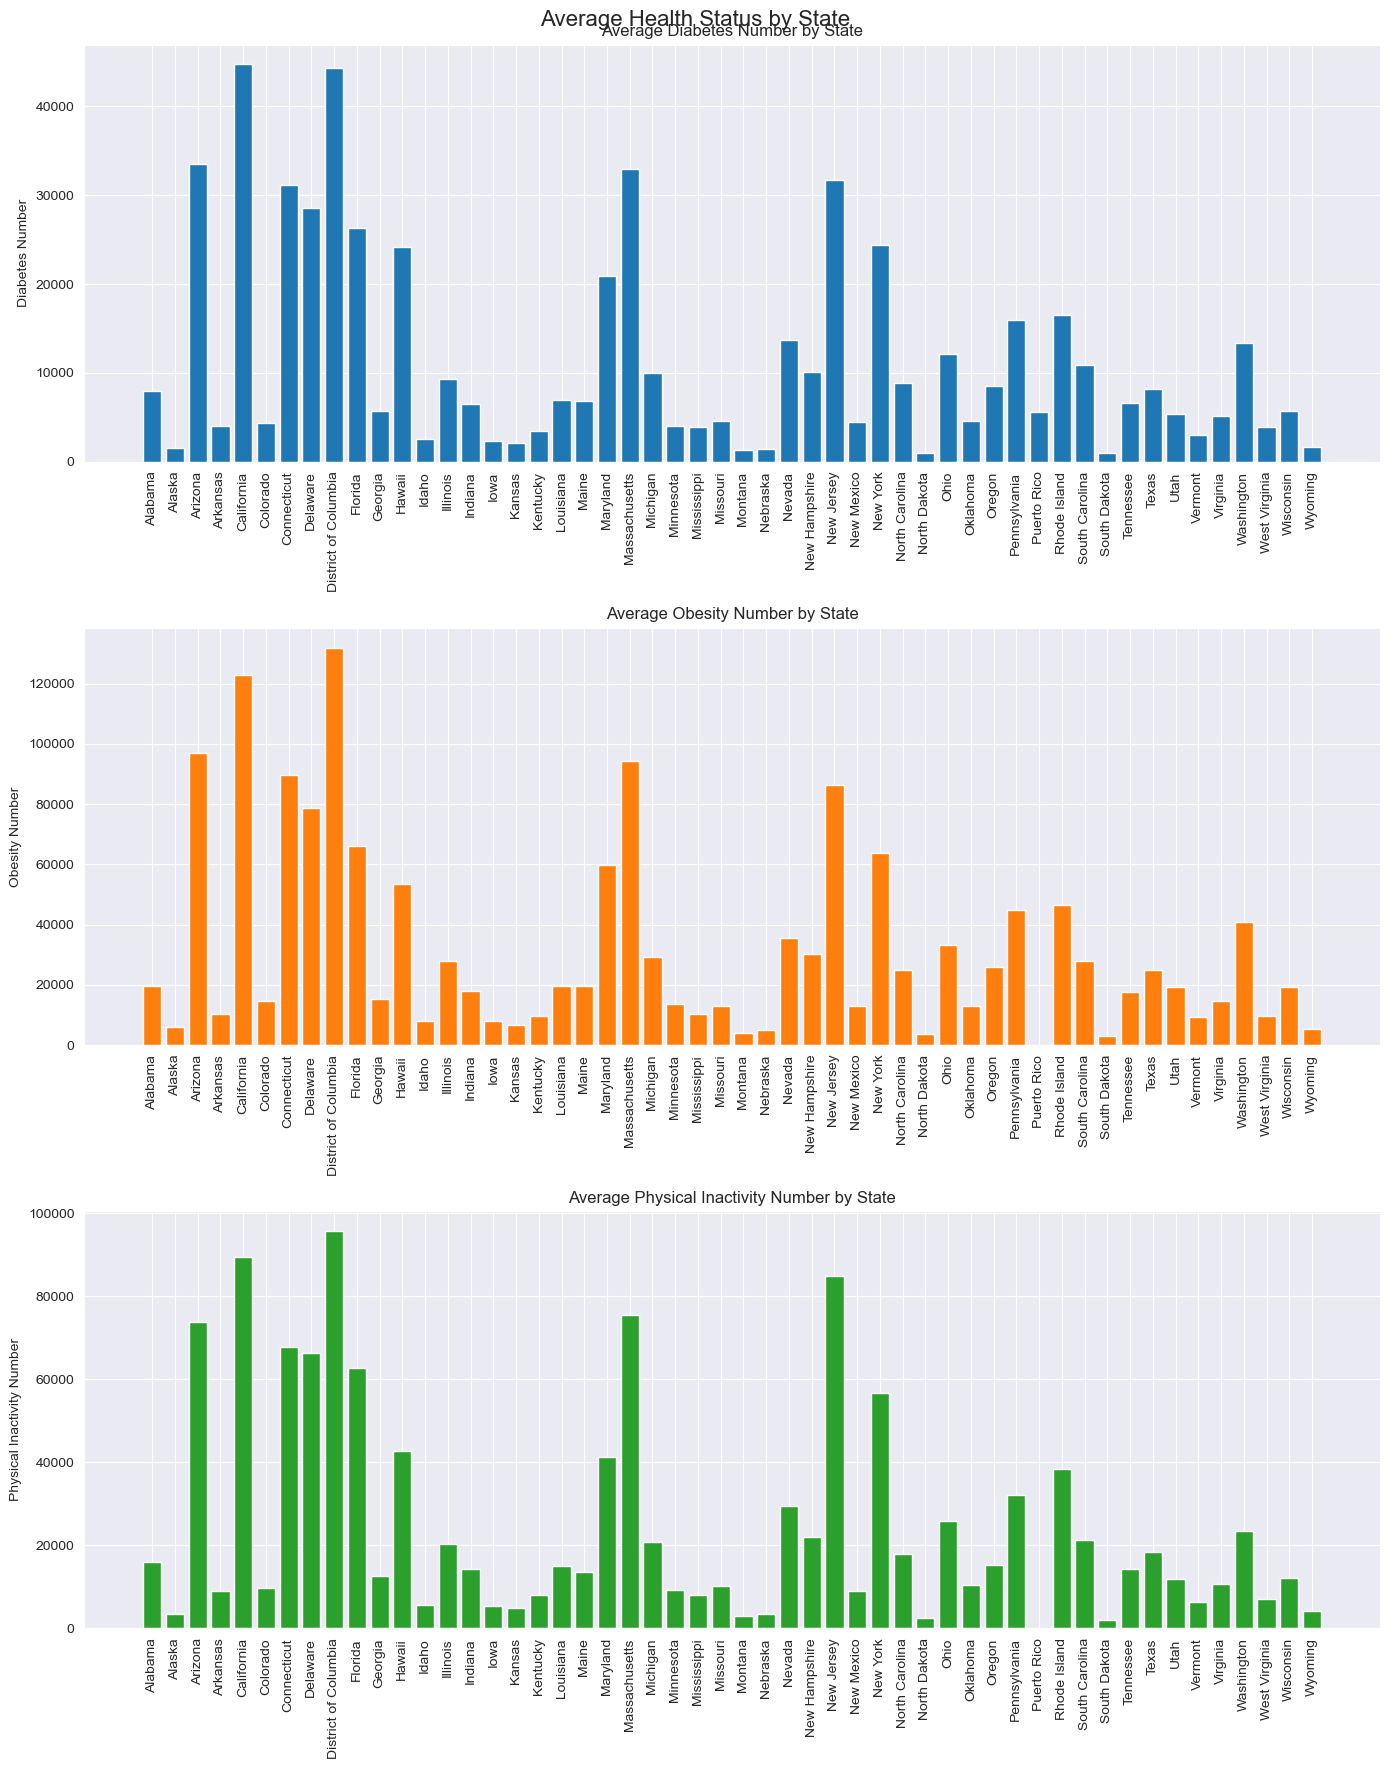

In [19]:
# Adjusting colors to higher contrast and setting RGB/hex codes for clear visibility
# Also increasing figure size to allow better spacing and visual clarity

# Set up the figure for subplots with updated colors
fig, axs = plt.subplots(3, 1, figsize=(14, 18))
fig.suptitle('Average Health Status by State', fontsize=16)

# Plot for Diabetes Number with high-contrast color
axs[0].bar(health_status_by_state.index, health_status_by_state['Diabetes_Number'], color='#1f77b4')  # Dark blue
axs[0].set_title('Average Diabetes Number by State')
axs[0].set_ylabel('Diabetes Number')
axs[0].tick_params(axis='x', rotation=90)

# Plot for Obesity Number with high-contrast color
axs[1].bar(health_status_by_state.index, health_status_by_state['Obesity_Number'], color='#ff7f0e')  # Dark orange
axs[1].set_title('Average Obesity Number by State')
axs[1].set_ylabel('Obesity Number')
axs[1].tick_params(axis='x', rotation=90)

# Plot for Physical Inactivity Number with high-contrast color
axs[2].bar(health_status_by_state.index, health_status_by_state['Physical_Inactivity_Number'], color='#2ca02c')  # Dark green
axs[2].set_title('Average Physical Inactivity Number by State')
axs[2].set_ylabel('Physical Inactivity Number')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


3. Prepare to Fit Models

3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using pd.get_dummies and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county.

In [20]:
# Drop and get dummies

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['Region'],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State'],
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10) 

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why.

In [21]:
# Partition data

# import library
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean['Diabetes_Number']

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(['Diabetes_Number', 
                        'race alone or in combination with one or more other races_total population'], 
                        axis=1)


Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic.

In [22]:
#
# Feature selection
#-----------
# Checking for highly correlated features
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

# Finding highly correlated pairs (correlation > 0.9)
high_corr_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            high_corr_features.append(colname)
            print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have correlation {correlation_matrix.iloc[i, j]:.3f}")

# Removing highly correlated features
X = X.drop(columns=list(set(high_corr_features)))

print("\nFeatures removed due to high correlation:", high_corr_features)

# Check for low variance features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  
selector.fit(X)
low_variance_mask = selector.get_support()
low_var_features = X.columns[~low_variance_mask].tolist()

print("\nFeatures removed due to low variance:", low_var_features)
X = X.loc[:, selector.get_support()]


ValueError: could not convert string to float: '-'

In [ ]:
# Training/test split

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=0.8,      # specify proportional split for training
                                                    test_size=0.2)       # specify proportional split for test

In [ ]:
# Validation split

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate =  train_test_split(X_train, 
                                                           y_train,
                                                           train_size=0.75,    
                                                           test_size=0.25)    

In [ ]:
# Standardization

# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

4. Train Models
In this section, train your models.

Note that if you use Lasso, you will likely need to specify a very low penalty (e.g., an alpha of 0.001) because of convergence problems.

4.1 Describe models
Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** 

4.2 Train models
Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

Model 1: Ordinary Least Square (OLS)

In [ ]:
#
# Model 1 training
#-----------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

ols_train_pred = ols_model.predict(X_train)

ols_train_r2 = r2_score(y_train, ols_train_pred)
ols_train_mse = mean_squared_error(y_train, ols_train_pred)
ols_train_rmse = np.sqrt(ols_train_mse)

print("OLS Training Results:")
print(f"R-squared: {ols_train_r2:.4f}")
print(f"RMSE: {ols_train_rmse:.4f}")
print(f"MSE: {ols_train_mse:.4f}")


#### Model 2:  LASSO 

In [ ]:
#
# Model 2 training
#-----------
from sklearn.linear_model import Lasso

# Define parameter grid for LASSO (using very low alpha values as suggested)
lasso_params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01]}

# Initialize LASSO with cross-validation
lasso_model = GridSearchCV(Lasso(), 
                          lasso_params, 
                          cv=5, 
                          scoring='neg_mean_squared_error')

# Train model
lasso_model.fit(X_train, y_train)

# Get predictions on training set
lasso_train_pred = lasso_model.predict(X_train)

# Calculate performance metrics
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_train_rmse = np.sqrt(lasso_train_mse)

print("LASSO Training Results:")
print(f"Best alpha: {lasso_model.best_params_['alpha']}")
print(f"R-squared: {lasso_train_r2:.4f}")
print(f"RMSE: {lasso_train_rmse:.4f}")
print(f"MSE: {lasso_train_mse:.4f}")

# For LASSO, also look at feature importance
lasso_coef = pd.DataFrame({'Feature': X_train.columns, 
                          'Coefficient': lasso_model.best_estimator_.coef_})
print("\nNon-zero LASSO coefficients:")
print(lasso_coef[lasso_coef.Coefficient != 0].sort_values('Coefficient', ascending=False))



#### Model 3:  Ridge Regression

In [ ]:
# Model 3 training

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Ridge
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge with cross-validation
ridge_model = GridSearchCV(Ridge(), 
                          ridge_params, 
                          cv=5, 
                          scoring='neg_mean_squared_error')

# Train model
ridge_model.fit(X_train, y_train)

# Get predictions on training set
ridge_train_pred = ridge_model.predict(X_train)

# Calculate performance metrics
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_train_rmse = np.sqrt(ridge_train_mse)

print("Ridge Training Results:")
print(f"Best alpha: {ridge_model.best_params_['alpha']}")
print(f"R-squared: {ridge_train_r2:.4f}")
print(f"RMSE: {ridge_train_rmse:.4f}")
print(f"MSE: {ridge_train_mse:.4f}")

5. Validate and Refine Models

5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [ ]:
# Predict on validation data

# OLS Validation
ols_val_pred = ols_model.predict(X_validate)
ols_val_r2 = r2_score(y_validate, ols_val_pred)
ols_val_rmse = np.sqrt(mean_squared_error(y_validate, ols_val_pred))

# Ridge Validation
ridge_val_pred = ridge_model.predict(X_validate)
ridge_val_r2 = r2_score(y_validate, ridge_val_pred)
ridge_val_rmse = np.sqrt(mean_squared_error(y_validate, ridge_val_pred))

# LASSO Validation
lasso_val_pred = lasso_model.predict(X_validate)
lasso_val_r2 = r2_score(y_validate, lasso_val_pred)
lasso_val_rmse = np.sqrt(mean_squared_error(y_validate, lasso_val_pred))

print("Validation Results:")
print("\nOLS Validation:")
print(f"R-squared: {ols_val_r2:.4f}")
print(f"RMSE: {ols_val_rmse:.4f}")

print("\nRidge Validation:")
print(f"R-squared: {ridge_val_r2:.4f}")
print(f"RMSE: {ridge_val_rmse:.4f}")

print("\nLASSO Validation:")
print(f"R-squared: {lasso_val_r2:.4f}")
print(f"RMSE: {lasso_val_rmse:.4f}")

5.2 Predict on the test set
Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set.

In [ ]:
# Predict using your best model

# We Choose LASSO as best model based on validation results and interpretability
# We only keep important features (those with non-zero coefficients from LASSO)
important_features = lasso_coef[lasso_coef.Coefficient != 0]['Feature'].tolist()
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Retrain LASSO with selected features
final_lasso = Lasso(alpha=0.0001)
final_lasso.fit(X_train_selected, y_train)

# Predict on test set
test_pred = final_lasso.predict(X_test_selected)
test_r2 = r2_score(y_test, test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("\nFinal Model Test Results:")
print(f"R-squared: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")


5.3 Impement a cross-validation approach
Finally, implement a cross-validation approach for your best model and evaluate the results.

In [ ]:
# Run cross-validation

from sklearn.model_selection import KFold, cross_val_score

# Implement 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(final_lasso, X_train_selected, y_train, 
                           cv=kf, scoring='r2')

print("\nCross-validation Results:")
print(f"Mean R-squared: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")
print("Individual fold scores:", cv_scores)

6. Discussion Questions
In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

2. Define overfitting, and why it matters for machine learning. How can we address it?

In machine learning, overfitting occurs when an algorithm fits too closely or even exactly to its training data, resulting in a model that cannot make accurate predictions or conclusions from any data other than the training data. Overfitting defeats the purpose of the machine learning model. We can address overfitting, by limiting the branch creation process in decision trees. We can enforce a maximum tree depth, maximum number of leaves, or minimum number of data points per leaf to prevent overfitting.

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

The counties in the mid-west region have higher diabetes number, obesity number, and physical inactivity number. Hence the counties in the mid-west region may be prioritized for the pilot program. Including race or gender would only lead to introducing bias in the testing. 

Assuming that race, gender, and age composition are on an average uniform, the pilot program can be implemented in the mid-west. If specific findings point to any preponderance based on age, then my answer may change based on that.

I am not confident in deploying this sort of model in real-world applications, especially in the medical field as I am not sure of the success rate of these models.